In [32]:
from collections import Counter
import random

NUM_OF_TRIALS = 10000

red_die = [4, 4, 4, 4, 4, 9]
blue_die = [2, 2, 2, 7, 7, 7]
green_die = [5, 5, 5, 5, 5, 0]
yellow_die = [3, 3, 3, 3, 8, 8]
purple_die = [6, 6, 6, 6, 1, 1]

dice = [red_die, blue_die, green_die, yellow_die, purple_die]
die_names = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']

In [33]:
def pool_vs_target(pool_die_type, num_in_pool, opposition_die_type):

    successes = 0
    opposition_score = random.choice(opposition_die_type)

    for i in range(num_in_pool):

        die_score = random.choice(pool_die_type)
        
        if die_score >= opposition_score:

            successes = successes + 1

    return successes

In [55]:
import statistics

pool_sizes = [1, 2, 3, 4, 5]
stds = []
avgs = []
rates = []

for x in pool_sizes:
    
    superior_trials = []

    for i in range(NUM_OF_TRIALS):
        superior_trials.append(pool_vs_target(red_die, x, purple_die))

    stds.append(statistics.pstdev(superior_trials))
    avgs.append(statistics.mean(superior_trials))
    rates.append(1.0 - (superior_trials.count(0) / NUM_OF_TRIALS))

In [57]:
print(rates)
print(avgs)

[0.4437, 0.5357000000000001, 0.6141, 0.6835, 0.7302]
[0.4437, 0.88, 1.3389, 1.7748, 2.1827]


In [35]:
avgs

[0.5794, 1.1684, 1.7447, 2.3454]

([<matplotlib.axis.XTick at 0x1efee917b48>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

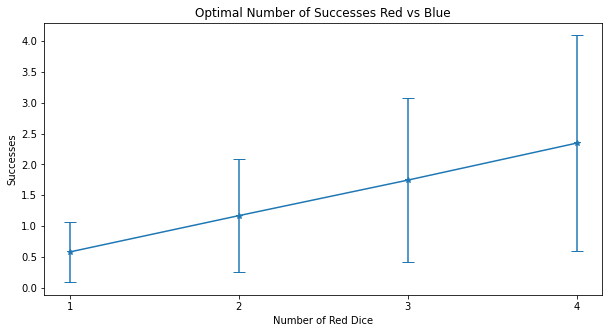

In [42]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Optimal Number of Successes Red vs Blue')
plt.errorbar(pool_sizes, avgs, stds, marker='*', capsize=6)
plt.xlabel('Number of Red Dice')
plt.ylabel('Successes')
plt.xticks(pool_sizes)

([<matplotlib.axis.XTick at 0x1efee98f388>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

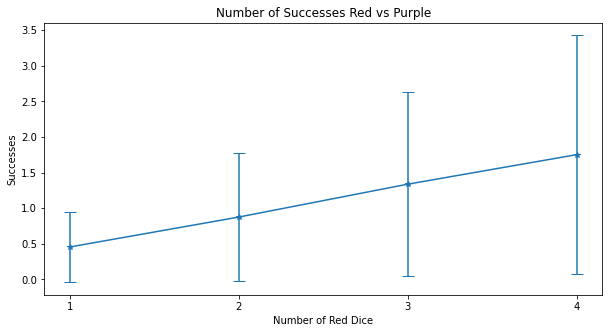

In [44]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Number of Successes Red vs Purple')
plt.errorbar(pool_sizes, avgs, stds, marker='*', capsize=6)
plt.xlabel('Number of Red Dice')
plt.ylabel('Successes')
plt.xticks(pool_sizes)

{'whiskers': [<matplotlib.lines.Line2D at 0x1efedfc92c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1efee004a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efedfff0c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1efee004ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efee00db08>],
 'means': []}

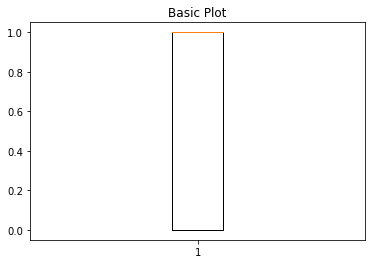

In [16]:
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(superior_trials)